In [1]:
import pandas as pd
from scikitplot.metrics import plot_roc, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
import numpy as np
import scikitplot as skplt#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
import time
import sys
import qgrid #Este paquete toca instalarlo o f
sys.path.append('..')
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier #esta parcera toca instalarla pip install xgboost
from funciones import classification_error,grafica_roc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
df=pd.read_csv('../../CSV ready to model/withoutPCA.csv')

In [2]:
le=LabelEncoder()
df['GRAVEDAD']=df.loc[:,['GRAVEDAD']].apply(le.fit_transform)
y=df['GRAVEDAD']
x=df.drop(['GRAVEDAD','PERIODO'],axis=1)

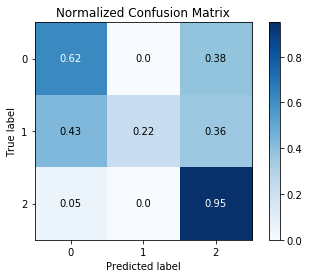

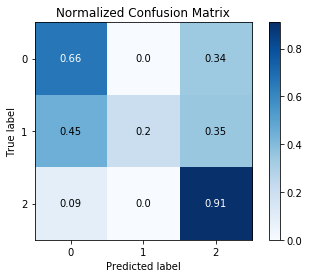

In [3]:
ABC = AdaBoostClassifier(n_estimators=5)
RF = RandomForestClassifier(n_estimators=100, max_features =5, n_jobs = -1)
XG = XGBClassifier(n_estimators=100, max_features =6, n_jobs = -1)

vc1 = VotingClassifier(estimators=[('ABC', ABC), ('rf', RF),('xg', XG)], voting='hard',n_jobs=-1)
vc2 = VotingClassifier(estimators=[('ABC', ABC), ('rf', RF),('xg', XG)], voting='soft',n_jobs=-1)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25)
                                                
vc1.fit(Xtrain,Ytrain)
vc2.fit(Xtrain,Ytrain)

pred1=vc1.predict(Xtest)
pred2=vc2.predict(Xtest)

skplt.metrics.plot_confusion_matrix(Ytest, pred1,normalize=True)
skplt.metrics.plot_confusion_matrix(Ytest, pred2,normalize=True)

In [8]:
def model_VC(x,y, impresion = False):

    tiempo_i = time.time()
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,3])
    recall_list = np.zeros([4,3])
    f_list = np.zeros([4,3])
    errores = np.zeros(4)
    ABC = AdaBoostClassifier(n_estimators=5)
    RF = RandomForestClassifier(n_estimators=100, max_features =5, n_jobs = -1)
    XG = XGBClassifier(n_estimators=100, max_features =6, n_jobs = -1)
    vc = VotingClassifier(estimators=[('ABC', ABC), ('rf', RF),('xg', XG)], voting='soft',n_jobs=-1)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25) # Modificar metodología de validación

        vc.fit(Xtrain, Ytrain)
        pred = vc.predict(Xtest)

        #code for calculating accuracy
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_

        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        errores[j] = classification_error(pred, Ytest)


    if impresion == True:
        skplt.metrics.plot_confusion_matrix(Ytest, pred)
        grafica_roc(model=vc,Xtest=Xtest,Ytest=Ytest)

    result={'Eficiencia':np.mean(accuracy_list),'Int_Eficiencia':np.std(accuracy_list),
        'Sensibilidad':np.mean(recall_list),'Int_Sensibilidad':np.std(recall_list),
        'Precisión':np.mean(precision_list),'Int Precisión':np.std(precision_list),
        'F':np.mean(f_list),'Int_F':np.std(f_list),
        'Error':np.mean(errores),'Int_Error':np.std(errores),
        'Tiempo':time.time()-tiempo_i
        }
    return  result

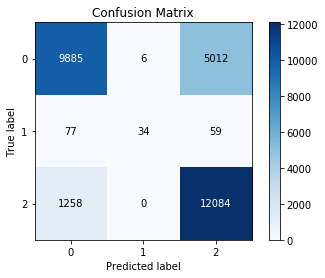

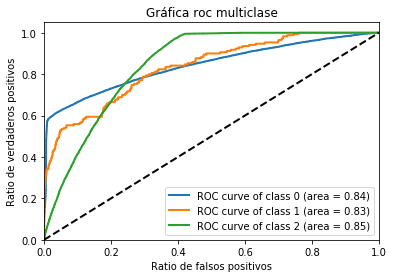

In [9]:
result=model_VC(x,y,impresion = True)

In [10]:
print(result)

{'Eficiencia': 0.7705085342248813, 'Int_Eficiencia': 0.0025624283021744303, 'Sensibilidad': 0.5789550167059703, 'Int_Sensibilidad': 0.3044969770930459, 'Precisión': 0.8288395424385392, 'Int Precisión': 0.0952522994875986, 'F': 0.6107081424309663, 'Int_F': 0.2277057463785159, 'Error': 0.22949146577511875, 'Int_Error': 0.002562428302174428, 'Tiempo': 70.95879745483398}


In [3]:

import smote_variants as sv
import matplotlib.pyplot as plt
import numpy as np

In [8]:
oversampler= sv.MulticlassOversampling(sv.distance_SMOTE(proportion=0.5))


In [9]:
x.shape

(113659, 9)

In [10]:
X_samp, y_samp= oversampler.sample(x, y)


2020-05-12 14:59:14,719:INFO:MulticlassOversampling: Running multiclass oversampling with strategy equalize_1_vs_many_successive
2020-05-12 14:59:14,743:INFO:MulticlassOversampling: Sampling minority class with label: 2
2020-05-12 14:59:14,753:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-05-12 14:59:26,322:INFO:MulticlassOversampling: Sampling minority class with label: 1
2020-05-12 14:59:26,327:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 0.4972104832378439, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


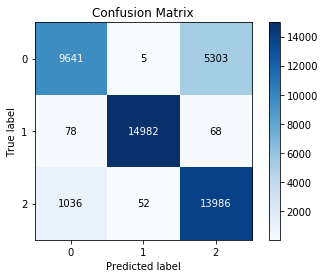

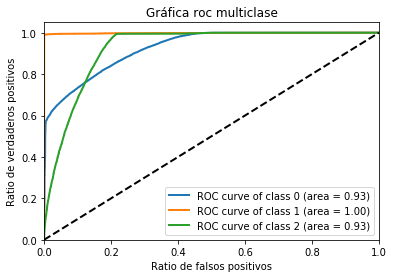

In [29]:
result=model_VC(X_samp,y_samp,impresion = True)

In [ ]:
y_samp.

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_samp, y_samp, test_size=0.25)


array([0, 0, 2, ..., 1, 1, 1])

In [30]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_samp, y_samp, test_size=0.25)


In [ ]:

vc1.fit(Xtrain,Ytrain)
vc2.fit(Xtrain,Ytrain)

pred1=vc1.predict(Xtest)
pred2=vc2.predict(Xtest)

skplt.metrics.plot_confusion_matrix(Ytest, pred1,normalize=True)